### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_deportistas = [("Rafa Nadal", 38, 1.85),("Pau Gasol", 44, 2.15),("Miguel Indurain",60, 1.86),("Fernando Alonso", 43, 1.79),("Iker Casillas", 43, 1.82),
                 ("Marc Marquez", 31, 1.75),("Ruth Beitia", 45, 1.91),("Andres Iniesta", 40, 1.71),("Mireia Belmonte", 34, 1.70),("Seve Ballesteros", 54, 1.83),
                 ("Carolina Marin", 31, 1.72),("Xavi Hernandez", 45, 1.70),("Angel Nieto", 70, 1.64 ),("David Cal", 42, 1.83),
                 ("Saul Craviotto", 40, 1.92),("Joan Llaneras", 55, 1.80 ),("Carlos Sainz", 62, 1.78),("Javier Fernandez", 33, 1.73),
                 ("Lydia Valentin", 39, 1.69),("Alberto Contador", 42, 1.76)
                 ] 

In [2]:
import pandas as pd

In [7]:
df = pd.DataFrame(lista_deportistas)
df.columns = ['Nombre', 'Edad', 'Altura']
df

,Nombre,Edad,Altura
0,Rafa Nadal,38,1.85
1,Pau Gasol,44,2.15
2,Miguel Indurain,60,1.86
3,Fernando Alonso,43,1.79
4,Iker Casillas,43,1.82
5,Marc Marquez,31,1.75
6,Ruth Beitia,45,1.91
7,Andres Iniesta,40,1.71
8,Mireia Belmonte,34,1.70
9,Seve Ballesteros,54,1.83


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  20 non-null     object 
 1   Edad    20 non-null     int64  
 2   Altura  20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [9]:
df.describe()

,Edad,Altura
count,20.000000,20.000000
mean,44.550000,1.797000
std,10.600273,0.112114
min,31.000000,1.640000
25%,38.750000,1.717500
50%,42.500000,1.785000
75%,47.250000,1.835000
max,70.000000,2.150000


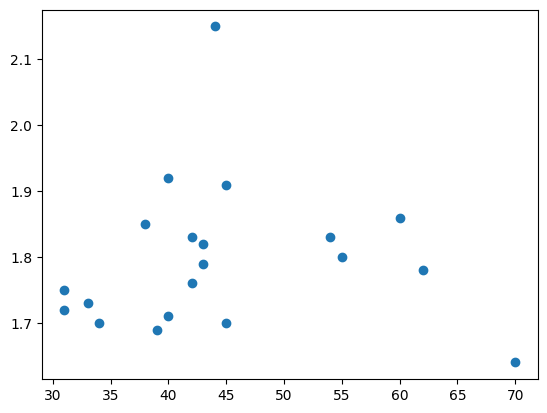

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'],df['Altura'])

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_13496\1025652608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Altura']);


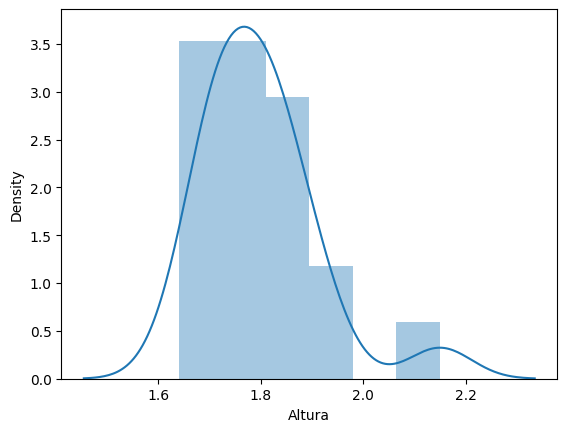

In [12]:
sns.distplot(df['Altura']);

In [14]:
X = df[['Edad']]  # Edad como variable independiente
y = df['Altura']  # Estatura como variable dependiente

In [15]:
from sklearn.model_selection import train_test_split


In [17]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (20, 1)
Train features shape: (16, 1)
Train target shape: (16,)
Test features shape: (4, 1)
Test target shape: (4,)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(model.intercept_, model.coef_)

1.768434906331515 [0.00015956]


(Altura) = 1.77 + 0.00016*(Edad)

In [25]:
# Prediccion
model.predict(X_test)

array([1.77449812, 1.77370033, 1.77721061, 1.77545547])

In [26]:
df_test = pd.DataFrame(X_test)
df_test

,Edad
0,38
17,33
15,55
1,44


In [27]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = model.predict(X_test)
df_test

,Edad,predict_height
0,38,1.774498
17,33,1.773700
15,55,1.777211
1,44,1.775455


In [28]:
df_test['real_height'] = y_test
df_test

,Edad,predict_height,real_height
0,38,1.774498,1.85
17,33,1.773700,1.73
15,55,1.777211,1.80
1,44,1.775455,2.15


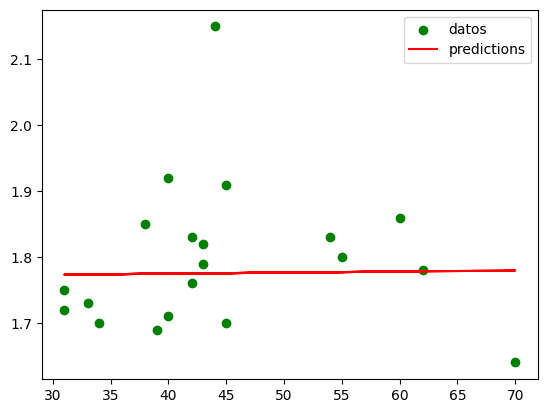

In [29]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos");
plt.plot(df['Edad'], model.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [30]:
model.score(X,y)

-0.03827147805846942

In [31]:
df_test

,Edad,predict_height,real_height
0,38,1.774498,1.85
17,33,1.773700,1.73
15,55,1.777211,1.80
1,44,1.775455,2.15


In [34]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
import numpy as np

In [ ]:
mae = mean_absolute_error(y_test, df['predict_height'])
mse = mean_squared_error(y_test,df['predict_height'])


KeyError: 'predict_height'

In [46]:
print('MAPE:', mean_absolute_percentage_error())

MAPE: 0.03253724207144201


In [37]:
model.predict([[85]])

c:\Users\javier.sdiaz\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-6v7GiuDz-py3.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.78199736])

In [38]:
df_test

,Edad,predict_height,real_height
0,38,1.774498,1.85
17,33,1.773700,1.73
15,55,1.777211,1.80
1,44,1.775455,2.15


In [39]:
df_test['error'] = 
df_test

SyntaxError: invalid syntax (2081523192.py, line 1)

In [57]:
df_test['error'].mean()

0.05706488156539665

In [58]:
df_test['error_cuadratico'] = 
df_test

,Edad,predict_height,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [59]:
df_test['error_cuadratico'].mean()

0.0036851216240520687

In [60]:
np.sqrt(df_test['error_cuadratico'].mean())

0.060705202611078306

In [63]:
df_test['error'].mean()/df_test['real_height'].mean()

0.032555352156298005